# **Projeto - Análise de dados - Acidentes Em Rodovias Federais**


 Projeto com dados disponíveis no site do governo: [Link](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import mysql.connector
#from sqlalchemy import create_engine


In [2]:
df_2020 = pd.read_csv("acidentes2020_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df_2021 = pd.read_csv("acidentes2021_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df_2022 = pd.read_csv("acidentes2022_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df_2023 = pd.read_csv("acidentes2023_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df = pd.concat([df_2020, df_2021, df_2022, df_2023], ignore_index=True)

### **Realizando a limpeza dos dados duplicados**

In [3]:
df = df.drop_duplicates()

In [5]:
df.shape

(1712888, 37)

In [4]:
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
1,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
2,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
3,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
4,260031.0,578987.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO


#### **Observando os tipos de dados das colunas**

In [6]:
tipos_de_variaveis = {}

for coluna in df.columns:
    tipos_de_variaveis[coluna] = str(df[coluna].dtype)
print(tipos_de_variaveis)

{'id': 'float64', 'pesid': 'float64', 'data_inversa': 'object', 'dia_semana': 'object', 'horario': 'object', 'uf': 'object', 'br': 'float64', 'km': 'object', 'municipio': 'object', 'causa_principal': 'object', 'causa_acidente': 'object', 'ordem_tipo_acidente': 'int64', 'tipo_acidente': 'object', 'classificacao_acidente': 'object', 'fase_dia': 'object', 'sentido_via': 'object', 'condicao_metereologica': 'object', 'tipo_pista': 'object', 'tracado_via': 'object', 'uso_solo': 'object', 'id_veiculo': 'int64', 'tipo_veiculo': 'object', 'marca': 'object', 'ano_fabricacao_veiculo': 'float64', 'tipo_envolvido': 'object', 'estado_fisico': 'object', 'idade': 'float64', 'sexo': 'object', 'ilesos': 'int64', 'feridos_leves': 'int64', 'feridos_graves': 'int64', 'mortos': 'int64', 'latitude': 'object', 'longitude': 'object', 'regional': 'object', 'delegacia': 'object', 'uop': 'object'}


#### **Excluindo Colunas Desnecessárias**

In [7]:
df = df.drop(['pesid', 'id_veiculo', 'causa_principal', 'regional'], axis=1)

#### **Formatação dos tipos de dados incorretos**

In [8]:

formatar_tipos = {'id': str, 
                    'ordem_tipo_acidente': int,
                    'idade': int,
                    'ilesos': int,
                    'feridos_leves': int,
                    'feridos_graves': int,
                    'mortos': int,
                    'br': str,
                    'ano_fabricacao_veiculo': str}
df = df.astype(formatar_tipos, errors='ignore')

#### **Encontrando colunas com valores vazios**

In [9]:
colunas_com_nan = df.columns[df.isna().any()]
print("Colunas com valores NaN:")
print(colunas_com_nan)

Colunas com valores NaN:
Index(['km', 'tipo_acidente', 'marca', 'idade', 'delegacia', 'uop'], dtype='object')


##### **Detalhando as colunas com valores vazios**


In [10]:
total_valores_nan_por_coluna = df[colunas_com_nan].isna().sum()
print("\nNúmero total de valores NaN por coluna:")
print(total_valores_nan_por_coluna)


Número total de valores NaN por coluna:
km                 5781
tipo_acidente         1
marca             74297
idade            170294
delegacia           813
uop                1453
dtype: int64


#### **Preenchendo colunas**

###### Colunas onde não há como preencher com dados reais

In [11]:
df.fillna({'km': 'Não informado', 
                'br': 'Não informado', 
                'marca': 'Não informado', 
                'ano_fabricacao_veiculo': 'Não informado',
                'tipo_acidente' : 'Desconhecido'
                }, inplace=True)

#### **Avaliando os dados referentes a idade**

In [12]:
media = (df['idade'].mean())
mediana = df['idade'].median()
desvio_padrao = np.std(df['idade'])
print(f'Média: {round(media, 2)}| Mediana: {round(mediana, 2)} | Desvio Padrão: {round(desvio_padrao, 4)}')

Média: 39.15| Mediana: 37.0 | Desvio Padrão: 38.6589


#### **Criando um Gráfico de Dispersão**

###### com o objetivo de procurar outliers

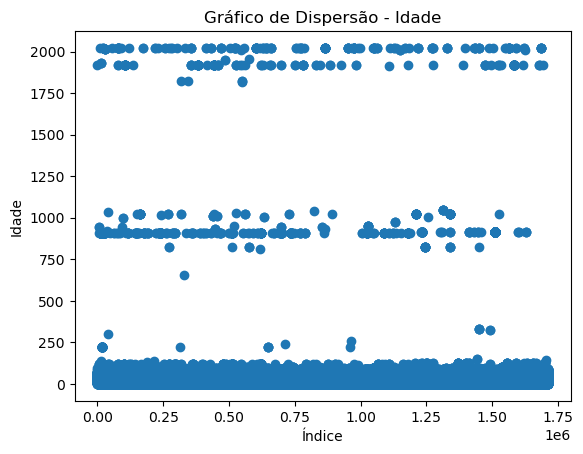

In [13]:
plt.scatter(range(len(df['idade'])), df['idade'])
plt.xlabel('Índice')
plt.ylabel('Idade')
plt.title('Gráfico de Dispersão - Idade')
plt.show()

#### **Medidas Ignorando os outliers**

In [14]:
media = df.loc[df['idade'] <= 100, 'idade'].mean()
mediana = df.loc[df['idade'] <= 100, 'idade'].median()
desvio_padrao = np.std(df.loc[df['idade'] <= 100, 'idade'])
print(f'Média: {round(media, 2)}| Mediana: {round(mediana, 2)} | Desvio Padrão: {round(desvio_padrao, 4)}')

Média: 38.21| Mediana: 37.0 | Desvio Padrão: 15.138


### **Substituindo valores na coluna idade**

In [15]:
#Atribuindo o valor 37 obtido na mediana para as idades onde o valor é maior que 100 anos
df.loc[df['idade'] > 100, 'idade'] = 37

In [16]:
#Atribuindo a média sem outliers aos dados faltantes
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['idade'].fillna(round(df['idade'].mean()), inplace=True)

#### **Criando um gráfico com os dados corrigidos**

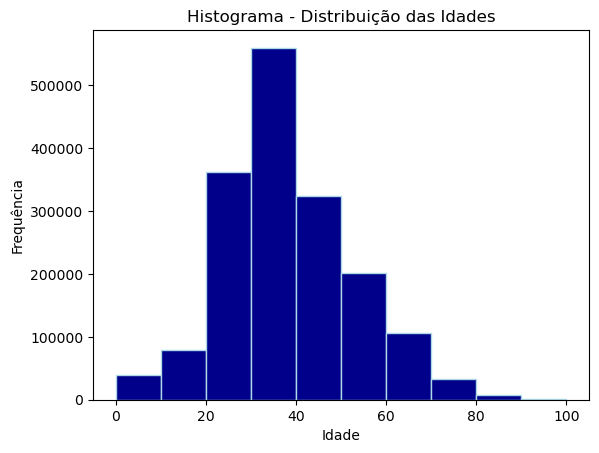

In [17]:
plt.hist(df['idade'], bins=10, edgecolor='lightblue', color='darkblue')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma - Distribuição das Idades')
plt.show()

### **Criando Uma Coluna Região**

In [18]:
#Criando uma lista com as regiões geográficas
sul = ['RS', 'PR', 'SC']
sudeste = ['SP', 'RJ', 'MG', 'ES']
centro_oeste = ['GO', 'MS', 'MT', 'DF']
nordeste = ['AL', 'BA', 'CE', 'MA','PB', 'PE', 'PI', 'RN', 'SE']
norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']

In [19]:
def mapear_regiao(uf):
    if uf in sudeste:
        return 'Sudeste'
    elif uf in sul:
        return 'Sul'
    elif uf in centro_oeste:
        return 'Centro_Oeste'
    elif uf in nordeste:
        return 'Nordeste'
    elif uf in norte:
        return 'Norte'
    
df['regiao'] = df['uf'].apply(mapear_regiao)

In [20]:
df['regiao'].unique()

array(['Norte', 'Sudeste', 'Sul', 'Nordeste', 'Centro_Oeste'],
      dtype=object)

#### **Preenchendo Colunas Com Base Em Outras**

*Coluna delegacia*

In [21]:
def gerar_string_delegacia(uf):
    return f'DEL-01 {uf}'

df['delegacia'].fillna(df['uf'].apply(lambda x: gerar_string_delegacia(x)), inplace=True)

*Coluna uop*

In [22]:
def gerar_string_uop(delegacia):
    return f'UOP-01 {delegacia}'

df['uop'].fillna(df['delegacia'].apply(lambda x: gerar_string_uop(x)), inplace=True)

#### **Corrigindo Formatação Defeituosa de dados**

*Coluna marca* - possui valores mal formatados

In [26]:
#Verificando a formatação dos dados
df['marca']

0             FIAT/SIENA ATTRACTIV 1.4
1             FIAT/SIENA ATTRACTIV 1.4
2             FIAT/SIENA ATTRACTIV 1.4
3             FIAT/SIENA ATTRACTIV 1.4
4             FIAT/SIENA ATTRACTIV 1.4
                      ...             
1712883         JEEP/RENEGADE SPORT AT
1712884              VOLVO/FH 460 6X2T
1712885       FORD/ECOSPORT SE ATDT1.5
1712886    Não se aplica/Não se aplica
1712887             HONDA/HR-V EXL CVT
Name: marca, Length: 1712888, dtype: object

In [27]:
def corrigir_repeticoes(valor):
    partes = valor.split('/') 
    partes_unicas = []
    for parte in partes:
        if parte not in partes_unicas:  
            partes_unicas.append(parte)
    return '/'.join(partes_unicas)

df['marca'] = df['marca'].apply(corrigir_repeticoes)

In [28]:
def corrigir_valores(valor):
    if valor.startswith('I/'):
        return valor[2:]  
    return valor

df['marca'] = df['marca'].apply(corrigir_valores)

*Verificando Alterações*

In [29]:
df['marca'][0:20]

0     FIAT/SIENA ATTRACTIV 1.4
1     FIAT/SIENA ATTRACTIV 1.4
2     FIAT/SIENA ATTRACTIV 1.4
3     FIAT/SIENA ATTRACTIV 1.4
4     FIAT/SIENA ATTRACTIV 1.4
5     FIAT/SIENA ATTRACTIV 1.4
6     FIAT/SIENA ATTRACTIV 1.4
7     FIAT/SIENA ATTRACTIV 1.4
8     FIAT/SIENA ATTRACTIV 1.4
9     FIAT/SIENA ATTRACTIV 1.4
10               Não informado
11               Não se aplica
12               Não informado
13               Não se aplica
14    RENAULT/SANDERO EXP1016V
15     VW/NOVA SAVEIRO RB MBVS
16       HONDA/CG 150 TITAN ES
17       HONDA/CG 150 TITAN ES
18       HONDA/CG 150 TITAN ES
19      CHEVROLET/CRUZE LTZ NB
Name: marca, dtype: object

***Formatando a coluna município***

In [30]:
def formatar_municipio(municipio):
    return municipio.title()

df['municipio'] = df['municipio'].apply(formatar_municipio)

*Verificando os valores*

In [31]:
df['municipio'].unique()[0:20]

array(['Gurupi', 'Nova Iguacu', 'Sao Jose', 'Cacoal', 'Reboucas',
       'Porto Velho', 'Barra Velha', 'Londrina', 'Uniao Dos Palmares',
       'Porto Alegre', 'Ibirama', 'Xanxere', 'Abreu E Lima',
       'Sao Pedro Da Cipa', 'Feira De Santana', 'Balneario Camboriu',
       'Ferreira Gomes', 'Goiania', 'Brasilia', 'Pindamonhangaba'],
      dtype=object)

***Formatando colunas"***

In [ ]:
df['idade'].unique()

In [32]:
def formatar_float(valor):
    if valor != 'não informado':
        return valor[:-2]
    return valor

df['br'] = df['br'].apply(formatar_float)
df['ano_fabricacao_veiculo'] = df['ano_fabricacao_veiculo'].apply(formatar_float)

In [33]:
df = df.astype({'idade': str}, errors='ignore')

df['idade'] = df['idade'].apply(formatar_float)

df = df.astype({'idade': int}, errors='ignore')

***Verificando alterações***

In [34]:
df['idade'].unique()

array([ 33,  18,  20,  16,  17,  38,  50,  22,  30,  19,  37,  61,  47,
        58,  60,  27,  29,  24,  21,  28,  52,  23,  51,  53,  46,  42,
        25,  34,  32,   6,   8,  62,  40,  15,  26,  14,  31,  45,   7,
        64,  54,  43,  57,  68,  35,  49,  67,  55,  36,  59,  41,  11,
        39,  10,  48,  70,  56,  44,  63,   3,   2,  86,  13,  93,   4,
        73,  71,  69,   5,  66,  65,  82,  92,  72,   9,  74,  77,  12,
        81,  83,  84,  80,  78,   0,  87,   1,  79,  76,  75,  97,  85,
        88,  91,  89,  99,  90,  95,  98,  94,  96, 100])

***Coluna BR***

In [35]:
df['br'].unique()

array(['153', '116', '101', '364', '319', '369', '104', '290', '470',
       '282', '156', '60', '20', '324', '373', '407', '381', '316', '262',
       '40', '376', '392', '163', '459', '277', '308', '10', '230', '222',
       '232', '50', '356', '70', '493', '393', '365', '280', '408', '135',
       '343', '158', '467', 'n', '361', '80', '414', '447', '242', '304',
       '259', '251', '110', '386', '210', '367', '146', '235', '487',
       '293', '174', '405', '465', '476', '226', '452', '330', '428',
       '482', '420', '472', '480', '401', '354', '469', '406', '423',
       '285', '424', '267', '427', '412', '471', '463', '429', '287',
       '272', '155', '485', '415', '448', '418', '425', '317', '402',
       '30', '468', '435', '419', '488', '421', '403', '359', '349',
       '416', '410', '432', '495', '477', '122', '422', '434', '484',
       '352', '426', '436', '265', '475', '433', '430', '437', '342',
       '494', '498'], dtype=object)

In [36]:
df.loc[df['br'] == 'n'][:5]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,uop,regiao
559,260202.0,2020-01-01,quarta-feira,15:55:00,MG,n,Não informado,Sabara,Defeito Mecânico no Veículo,1,...,Masculino,0,1,0,0,"-19,78607788","-43,71630549",DEL01-MG,UOP01-DEL01-MG,Sudeste
4491,261027.0,2020-01-05,domingo,15:30:00,RJ,n,Não informado,Rio De Janeiro,Velocidade Incompatível,1,...,Masculino,1,0,0,0,"-22,8042662","-43,3391125",DEL01-RJ,UOP02-DEL01-RJ,Sudeste
4492,261027.0,2020-01-05,domingo,15:30:00,RJ,n,Não informado,Rio De Janeiro,Velocidade Incompatível,1,...,Masculino,1,0,0,0,"-22,8042662","-43,3391125",DEL01-RJ,UOP02-DEL01-RJ,Sudeste
4493,261027.0,2020-01-05,domingo,15:30:00,RJ,n,Não informado,Rio De Janeiro,Velocidade Incompatível,1,...,Masculino,1,0,0,0,"-22,8042662","-43,3391125",DEL01-RJ,UOP02-DEL01-RJ,Sudeste
6402,261493.0,2020-01-08,quarta-feira,04:30:00,MT,n,Não informado,Santo Antonio Do Leverger,Falta de Atenção à Condução,1,...,Masculino,1,0,0,0,"-15,70200126","-55,827522",DEL02-MT,UOP02-DEL01-MT,Centro_Oeste


***Coluna Ano de fabricação***

In [37]:
df['ano_fabricacao_veiculo'].unique()

array(['2012', 'n', '0', '2010', '2019', '2009', '2015', '2017', '2007',
       '2008', '1997', '2013', '2011', '1988', '2006', '1999', '2016',
       '2005', '2004', '2018', '1989', '2003', '2001', '2002', '2014',
       '1993', '1994', '1998', '2000', '1990', '1991', '1996', '1982',
       '1995', '1973', '1992', '1985', '1968', '1978', '1977', '1987',
       '1900', '1976', '1983', '1980', '1986', '1975', '1967', '1984',
       '1972', '1979', '1966', '1963', '1974', '1981', '1969', '1971',
       '1970', '2020', '1962', '1959', '1965', '1961', '1958', '2021',
       '1964', '1960', '2022', '1929', '1946', '2023', '1955'],
      dtype=object)

#### ***Corrigindo a coluna BR e Ano de Fabricação***

In [ ]:
df['br'] = df['br'].replace('n', 'Não informado')

df['ano_fabricacao_veiculo'] = df['ano_fabricacao_veiculo'].replace(['n', '0'], 'Não informado')

*Visualizando*

In [38]:
print('Quantidade de valores "Não informado" | BR: ', df.loc[df['br'] == 'Não informado', 'br'].count(), end='')
print(' | Ano de Fabricação: ', df.loc[df['ano_fabricacao_veiculo'] == 'Não informado', 'br'].count())

Quantidade de valores "Não informado" | BR:  0 | Ano de Fabricação:  0


#### **Substituindo os valores da coluna "uso_solo"**

*Com base no dicionário dos dados* - [link](https://drive.google.com/file/d/11xcaEgl1hpyfl2hnlFaa0MsxERd6uaKF/view)

In [39]:
def renomear_uso_solo(uso_solo):
    if uso_solo == "Não":
        return 'Rural'
    return 'Urbano'

df['uso_solo'] = df['uso_solo'].apply(renomear_uso_solo)

*Visualizando*

In [40]:
df['uso_solo'].unique()

array(['Rural', 'Urbano'], dtype=object)

##### ***Substituindo a "," por "."***

In [41]:
def virgula_por_ponto(df, colunas):
    for coluna in colunas:
        df[coluna] = df[coluna].str.replace(',', '.')

In [42]:
virgula_por_ponto(df, ['latitude', 'longitude', 'km'])

*Visualizando*

In [43]:
print('Km', df['km'].unique()[0:10])
print('Latitude', df['latitude'].unique()[0:4])
print('Longitude', df['longitude'].unique()[0:4])

Km ['678.1' '178' '206.9' '236' '360' '64' '89.9' '155' '37' '97']
Latitude ['-11.77460203' '-22.75223028' '-27.59193546' '-11.44624577']
Longitude ['-49.10744996' '-43.4379103' '-48.61824557' '-61.43761218']


In [44]:
df.loc[0]

id                                        260031.0
data_inversa                            2020-01-01
dia_semana                            quarta-feira
horario                                   01:00:00
uf                                              TO
br                                             153
km                                           678.1
municipio                                   Gurupi
causa_acidente                    Animais na Pista
ordem_tipo_acidente                              1
tipo_acidente              Atropelamento de Animal
classificacao_acidente         Com Vítimas Feridas
fase_dia                               Plena Noite
sentido_via                              Crescente
condicao_metereologica                     Nublado
tipo_pista                                 Simples
tracado_via                                   Reta
uso_solo                                     Rural
tipo_veiculo                             Automóvel
marca                     FIAT/

**Importando para um Banco de dados local**

In [ ]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='admin',
    database='dados_prf'
)

In [ ]:
'''table_name = 'acidentes_rodovias_prf'

cursor = conn.cursor()

create_table_query = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
    id INT,
    data_inversa VARCHAR(10),
    dia_semana VARCHAR(20),
    horario VARCHAR(10),
    uf VARCHAR(2),
    br VARCHAR(10),
    km VARCHAR(20),
    municipio VARCHAR(100),
    causa_acidente VARCHAR(100),
    ordem_tipo_acidente INT,
    tipo_acidente VARCHAR(100),
    classificacao_acidente VARCHAR(100),
    fase_dia VARCHAR(50),
    sentido_via VARCHAR(50),
    condicao_metereologica VARCHAR(50),
    tipo_pista VARCHAR(50),
    tracado_via VARCHAR(50),
    uso_solo VARCHAR(50),
    tipo_veiculo VARCHAR(50),
    marca VARCHAR(100),
    ano_fabricacao_veiculo VARCHAR(20),
    tipo_envolvido VARCHAR(50),
    estado_fisico VARCHAR(50),
    idade INT,
    sexo VARCHAR(15),
    ilesos INT,
    feridos_leves INT,
    feridos_graves INT,
    mortos INT,
    latitude VARCHAR(100),
    longitude VARCHAR(100),
    delegacia VARCHAR(100),
    uop VARCHAR(100),
    regiao VARCHAR(100)
)
"""

cursor.execute(create_table_query)

for index, row in df.iterrows():
    sql = f"INSERT INTO {table_name} VALUES ({', '.join(['%s'] * len(row))})"
    values = tuple(row)
    cursor.execute(sql, values)

conn.commit()
conn.close()'''

'table_name = \'acidentes_rodovias_prf\'\n\ncursor = conn.cursor()\n\ncreate_table_query = f"""\nCREATE TABLE IF NOT EXISTS {table_name} (\n    id INT,\n    data_inversa VARCHAR(10),\n    dia_semana VARCHAR(20),\n    horario VARCHAR(10),\n    uf VARCHAR(2),\n    br VARCHAR(10),\n    km VARCHAR(20),\n    municipio VARCHAR(100),\n    causa_acidente VARCHAR(100),\n    ordem_tipo_acidente INT,\n    tipo_acidente VARCHAR(100),\n    classificacao_acidente VARCHAR(100),\n    fase_dia VARCHAR(50),\n    sentido_via VARCHAR(50),\n    condicao_metereologica VARCHAR(50),\n    tipo_pista VARCHAR(50),\n    tracado_via VARCHAR(50),\n    uso_solo VARCHAR(50),\n    tipo_veiculo VARCHAR(50),\n    marca VARCHAR(100),\n    ano_fabricacao_veiculo VARCHAR(20),\n    tipo_envolvido VARCHAR(50),\n    estado_fisico VARCHAR(50),\n    idade INT,\n    sexo VARCHAR(15),\n    ilesos INT,\n    feridos_leves INT,\n    feridos_graves INT,\n    mortos INT,\n    latitude VARCHAR(100),\n    longitude VARCHAR(100),\n    de

In [45]:
colunas_para_somar = ['mortos', 'feridos_leves', 'feridos_graves', 'ilesos']

In [46]:
df_simplificado = df.groupby('id').agg({
    **{col: 'sum' for col in colunas_para_somar},
    **{col: 'first' for col in df.columns if col != 'id' and col not in colunas_para_somar} 
}).reset_index()

In [47]:
df_simplificado.drop(['ordem_tipo_acidente', 'tipo_envolvido', 'estado_fisico', 'idade', 'sexo'], axis=1, inplace=True)

In [48]:
df_simplificado.loc[9]

id                                           260044.0
mortos                                              0
feridos_leves                                       2
feridos_graves                                      0
ilesos                                              0
data_inversa                               2020-01-01
dia_semana                               quarta-feira
horario                                      00:20:00
uf                                                 RS
br                                                290
km                                                 97
municipio                                Porto Alegre
causa_acidente            Falta de Atenção à Condução
tipo_acidente                              Tombamento
classificacao_acidente            Com Vítimas Feridas
fase_dia                                  Plena Noite
sentido_via                               Decrescente
condicao_metereologica                      Céu Claro
tipo_pista                  

In [49]:
colunas_desejadas = ['id', 'sexo', 'regiao', 'uf', 'municipio', 'condicao_metereologica', 'fase_dia', 'tipo_veiculo', 'mortos']
df = df.loc[:, colunas_desejadas]

 **Dividindo os dfs**

In [58]:
meio_indice = len(df_simplificado) // 2

metade1 = df_simplificado.iloc[:meio_indice].reset_index(drop=True)
metade2 = df_simplificado.iloc[meio_indice:].reset_index(drop=True)

metade1.to_csv("Dados_prf_simplificado_parte1.txt")
metade2.to_csv("Dados_prf_simplificado_parte2.txt")

In [59]:
meio_indice = len(df) // 2

metade1 = df.iloc[:meio_indice].reset_index(drop=True)
metade2 = df.iloc[meio_indice:].reset_index(drop=True)

metade1.to_csv("Dados_sexo_parte1.txt")
metade2.to_csv("Dados_sexo_parte2.txt")